Libraries and load dataset

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

Data Preprocessing

In [8]:

# Calculate total spending per customer
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending.rename(columns={'TotalValue': 'TotalSpending'}, inplace=True)

# Calculate average spending per customer
avg_spending = transactions.groupby('CustomerID')['TotalValue'].mean().reset_index()
avg_spending.rename(columns={'TotalValue': 'AvgSpending'}, inplace=True)

# Calculate the number of transactions per customer
transaction_count = transactions.groupby('CustomerID')['TransactionID'].count().reset_index()
transaction_count.rename(columns={'TransactionID': 'TransactionCount'}, inplace=True)

# Merge features with customer data
customer_features = customers.merge(customer_spending, on='CustomerID', how='left')
customer_features = customer_features.merge(avg_spending, on='CustomerID', how='left')
customer_features = customer_features.merge(transaction_count, on='CustomerID', how='left')

# Handle missing values
customer_features.fillna(0, inplace=True)

# Extract features for clustering
feature_columns = ['TotalSpending', 'AvgSpending', 'TransactionCount']  # Add more features if needed
X = customer_features[feature_columns]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
DBSCAN

In [9]:
# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust epsilon (eps) and min_samples as needed
customer_features['Cluster'] = dbscan.fit_predict(X_scaled)

DB Index

Silhouette Score

In [10]:

# Clustering Evaluation: Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, customer_features['Cluster'])
silhouette = silhouette_score(X_scaled, customer_features['Cluster'])

# Print clustering metrics
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette}')

Davies-Bouldin Index: 3.6434929025580938
Silhouette Score: -0.07512580046030942


Plotting

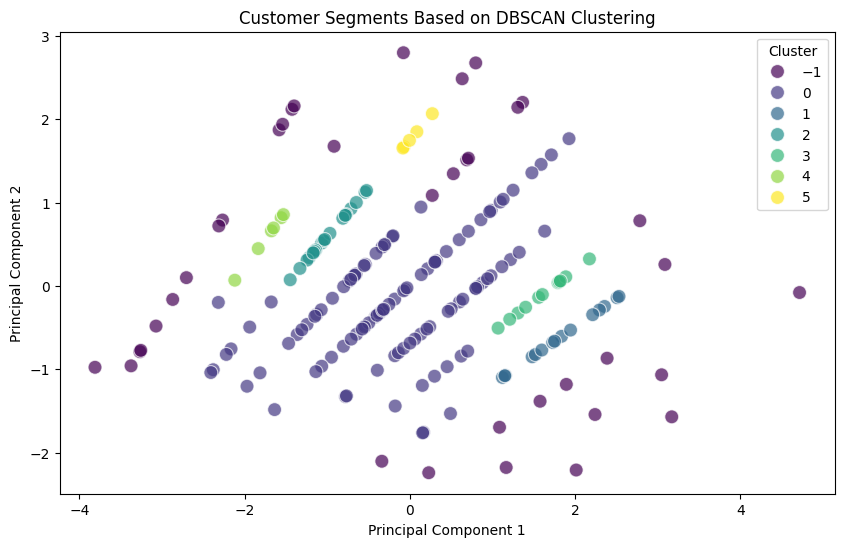

In [11]:
# Visualize clusters using PCA for 2D visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
customer_features['PCA1'] = principal_components[:, 0]
customer_features['PCA2'] = principal_components[:, 1]

# Plot the clusters (with noise points as a separate color)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_features, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments Based on DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [12]:
# Count number of noise points
noise_points = customer_features[customer_features['Cluster'] == -1]
num_noise_points = noise_points.shape[0]

# Print number of noise points
print(f"Number of noise points: {num_noise_points}")


Number of noise points: 37
